In [1]:
import radar_attenuation.gaia_util as gu
import radar_attenuation.gaia_eutectic_util as geu

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
T0 = 110 # K
Tb = 272.976
scaleD = 21. # km
scaleC =  0 # kg/m3
scaleT = (Tb-T0)
R0 = 252100.0

In [3]:
caseID = 'ann2_66_RR0.9167_P0.08'
path_to_caseID = '../data/gaia/temp_profile/gaia_grainsize_simulations/grain_1e-3/'

return_list = gu.load_sim(caseID, path_to_caseID, -1)
s_1e3 = return_list[0]
o_1e3 = return_list[1]
nShells = o_1e3.grid.nShells
nCellsPerShell = o_1e3.grid.nCellsPerShell[0]
gaia_temp_table_1e3 = gu.transform_T_to_table(s_1e3, o_1e3, caseID, T0, scaleT, scaleD, scaleC)
df_1e3, attenuation_1e3 = gu.calc_gaia_attenuation(gaia_temp_table_1e3, R0, nShells, nCellsPerShell, "low_loss", '1e-3')

# fig, ax = plt.subplots(1, 1, figsize = (2, 7), dpi = 500)
# cb = gu.mk_gaia_T_plot(o_1e3, scaleT, T0, Tb, fig, ax, 8, cbar_ax = [0, 0.085, 0.9, 0.015], lowerlim = T0)

Case: ann2_66_RR0.9167_P0.08 Loaded Grid: ann2_66_RR0.9167_P0.08.grid
Got 0 new files, 1 in total.
Loaded time 12.854793051942272 and iteration 29985
cells per depth 384.0


In [4]:
caseID = 'ann2_129_RR0.9167_P0.08'
path_to_caseID = '../data/gaia/temp_profile/gaia_grainsize_simulations/grain_1e-4/'


return_list = gu.load_sim(caseID, path_to_caseID, -1)
s_1e4 = return_list[0]
o_1e4 = return_list[1]
nShells = o_1e4.grid.nShells
nCellsPerShell = o_1e4.grid.nCellsPerShell[0]
gaia_temp_table_1e4 = gu.transform_T_to_table(s_1e4, o_1e4, caseID, T0, scaleT, scaleD, scaleC)
df_1e4, attenuation_1e4 = gu.calc_gaia_attenuation(gaia_temp_table_1e4, R0, nShells, nCellsPerShell, "low_loss", '1e-4')

# fig, ax = plt.subplots(1, 1, figsize = (2, 7), dpi = 500)
# cb = gu.mk_gaia_T_plot(o_1e4, scaleT, T0, Tb, fig, ax, 8, cbar_ax = [0, 0.085, 0.9, 0.015], lowerlim = T0)

Case: ann2_129_RR0.9167_P0.08 Loaded Grid: ann2_129_RR0.9167_P0.08.grid
Got 0 new files, 1 in total.
Loaded time 1.3987502210449598 and iteration 87600
cells per depth 748.0


In [1]:
caseID = 'ann2_192_RR0.9167_P0.08'
path_to_caseID = '../data/gaia/temp_profile/gaia_grainsize_simulations/grain_1e-5/'

return_list = gu.load_sim(caseID, path_to_caseID, -1)
s_1e5 = return_list[0]
o_1e5 = return_list[1]
nShells = o_1e5.grid.nShells
nCellsPerShell = o_1e5.grid.nCellsPerShell[0]
gaia_temp_table_1e5 = gu.transform_T_to_table(s_1e5, o_1e5, caseID, T0, scaleT, scaleD, scaleC)
df_1e5, attenuation_1e5 = gu.calc_gaia_attenuation(gaia_temp_table_1e5, R0, nShells, nCellsPerShell, "low_loss", '1e-5')
# fig, ax = plt.subplots(1, 1, figsize = (2, 7), dpi = 500)
# cb = gu.mk_gaia_T_plot(o_1e5, scaleT, T0, Tb, fig, ax, 8, cbar_ax = [0, 0.085, 0.9, 0.015], lowerlim = T0)

NameError: name 'gu' is not defined

In [6]:
convective_type_list = [np.random.choice(['conductive', 'convective', 'vigorously convective']) for x in range(100)]
type_map = {"conductive": df_1e3,
            "convective": df_1e4,
            "vigorously convective": df_1e5}
df_dict = {"convective_type": convective_type_list,
               "num_low_freq_impules": [],
               "std": [],
               "prediction": [],
               "prediction_status": []}


for convective_type in convective_type_list:
    gaia_df =  type_map[convective_type]
    depthwise_df = gu.calc_angular_ratio_data([gaia_df], 'Grain Size')

    line_segment_list, _, _  = geu.calc_sparse_eutectic(depthwise_df)
    prediction_dict = geu.predict_eutetic(line_segment_list[:, 1])

    df_dict['num_low_freq_impules'].append(prediction_dict['num_low_freq_impules'])
    df_dict['std'].append(prediction_dict['std'])
    df_dict['prediction'].append(prediction_dict['prediction'])
    df_dict["prediction_status"].append(True if prediction_dict['prediction'] == convective_type else False)

    if  df_dict['prediction'] != 'empty' and df_dict['std'] == 0.0:
        print(line_segment_list)



pd.DataFrame(df_dict)

,convective_type,num_low_freq_impules,std,prediction,prediction_status
0,conductive,3,7.577801e-14,conductive,True
1,vigorously convective,12,1.783536e+00,vigorously convective,True
2,conductive,1,8.031481e-14,conductive,True
3,vigorously convective,0,0.000000e+00,empty,False
4,vigorously convective,21,2.203390e+00,vigorously convective,True
...,...,...,...,...,...
95,conductive,1,7.557408e-14,conductive,True
96,convective,0,0.000000e+00,empty,False
97,vigorously convective,0,0.000000e+00,empty,False
98,vigorously convective,2,1.555104e+00,convective,False


In [29]:
prediction_df = pd.DataFrame(df_dict)


prediction_df.query("convective_type == 'convective' and prediction != 'empty'")['prediction_status'].value_counts()

prediction_status
False    26
True      4
Name: count, dtype: int64

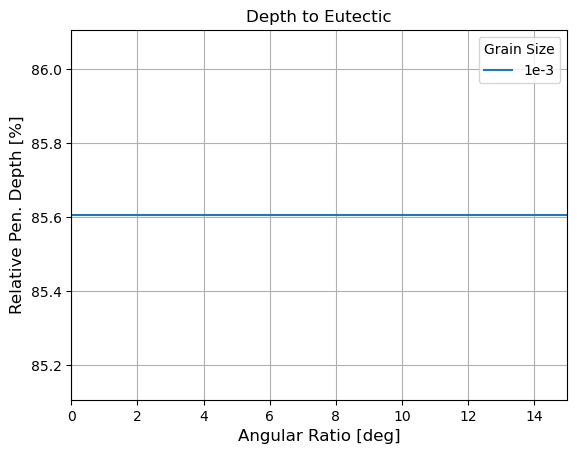

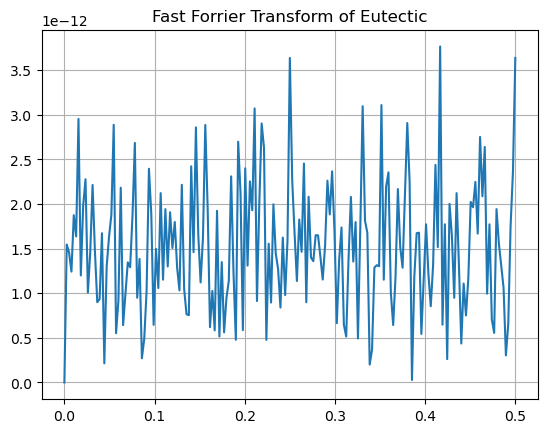

{'std': 8.186031050648062e-14, 'num_low_freq_impules': 7, 'prediction': 'conductive'}


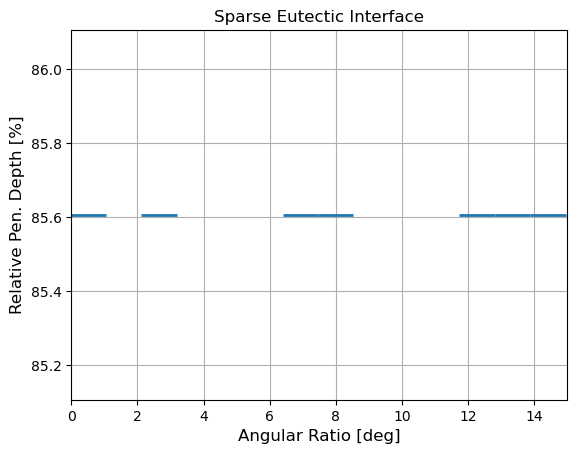

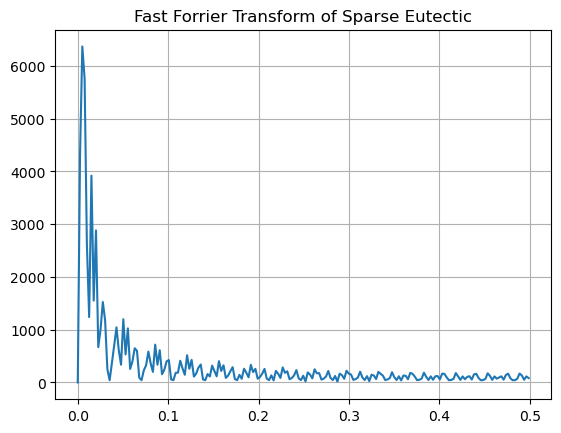

{'std': 8.557401788240672e-14, 'num_low_freq_impules': 3, 'prediction': 'conductive'}


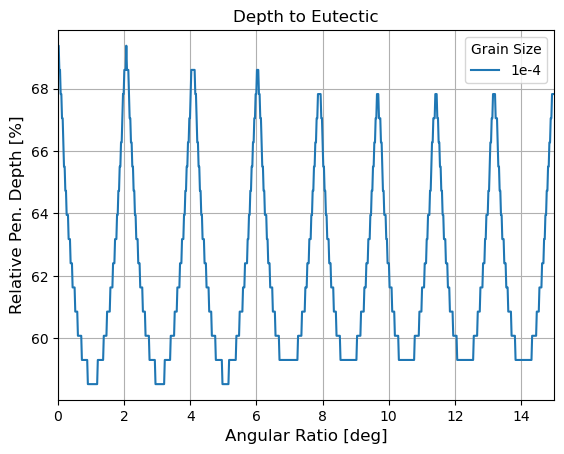

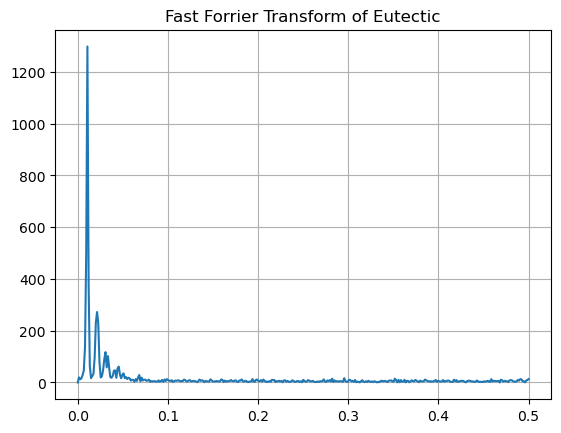

{'std': 2.9128044195302376, 'num_low_freq_impules': 2, 'prediction': 'convective'}


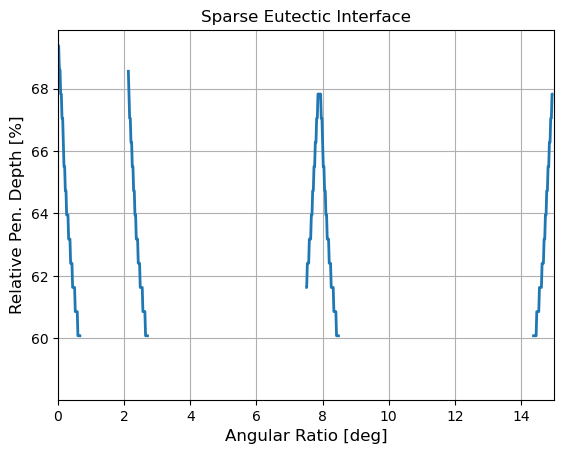

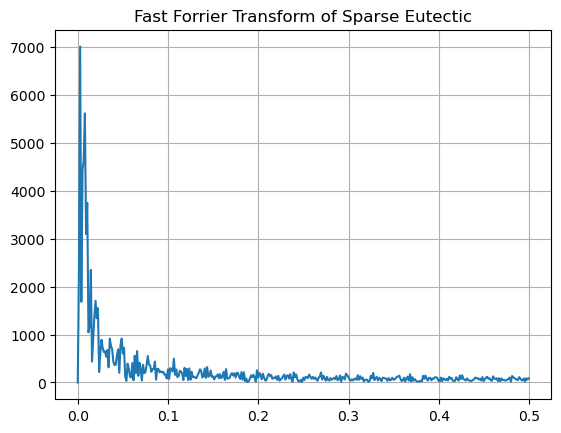

{'std': 2.6589558562171094, 'num_low_freq_impules': 4, 'prediction': 'vigorously convective'}


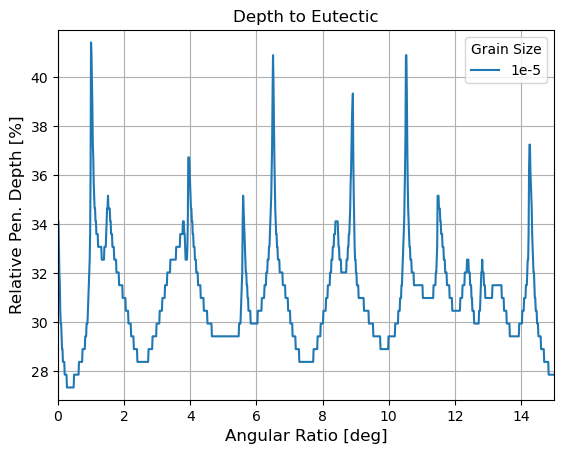

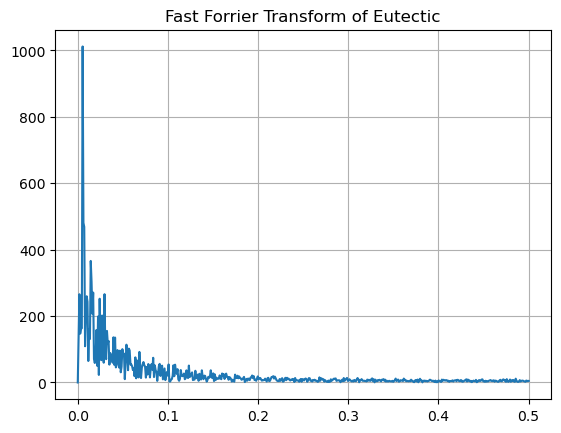

{'std': 2.1609311062788135, 'num_low_freq_impules': 8, 'prediction': 'vigorously convective'}


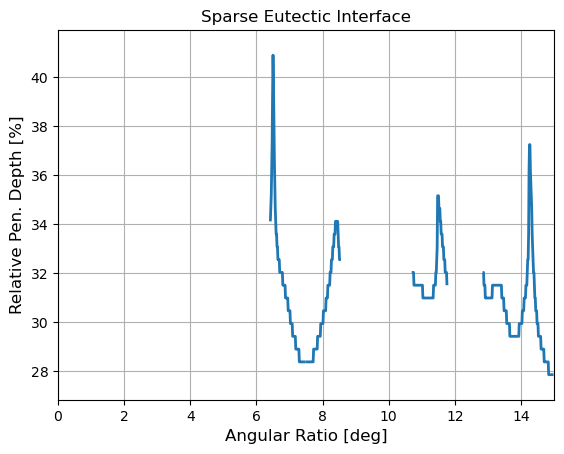

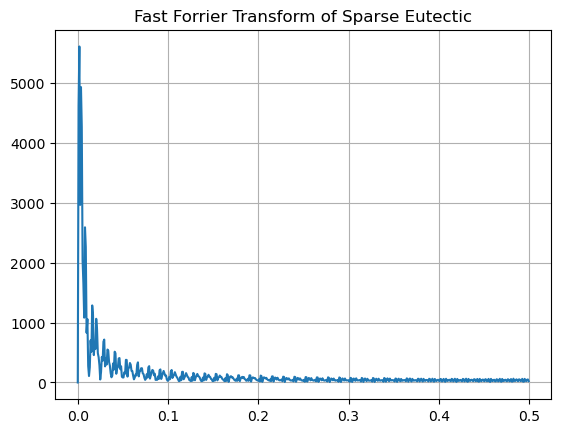

{'std': 2.0640457285313247, 'num_low_freq_impules': 3, 'prediction': 'vigorously convective'}


In [8]:
depthwise_df_dict = {}
for df, grain_label in [(df_1e3, '1e3'), (df_1e4, '1e4'), (df_1e5, '1e5')]:
    depthwise_df = gu.calc_angular_ratio_data([df], 'Grain Size')
    depthwise_df_dict[grain_label] = depthwise_df

    geu.mk_angular_ratio_plot(depthwise_df, 'Depth to Eutectic', 'Grain Size', plot_eutectic=True)
    plt.show()
    eutetic_depth = depthwise_df.query("depth_model == 'depth to eutectic'")['depth'].values
    geu.mk_fft_plot(eutetic_depth, 'Fast Forrier Transform of Eutectic')
    plt.show()
    print(geu.predict_eutetic(eutetic_depth))


    line_segment_list, new_plotting_list, depth_range  = geu.calc_sparse_eutectic(depthwise_df)
    plot = geu.mk_sparse_angular_plot(new_plotting_list,depth_range ,"Sparse Eutectic Interface")  
    plt.show()

    geu.mk_fft_plot(line_segment_list[:, 1], 'Fast Forrier Transform of Sparse Eutectic')
    plt.show()
    prediction_dict = geu.predict_eutetic(line_segment_list[:, 1])
    
    print(prediction_dict)
    depthwise_df_dict[grain_label+"_sparse"] = line_segment_list

In [9]:
# prediction_dict = geu.predict_eutetic(eutetic_depth['depth'].values)
eutetic_depth

array([34.11458333, 34.11458333, 33.07291667, ..., 27.86458333,
       27.86458333, 27.86458333])

<Axes: >

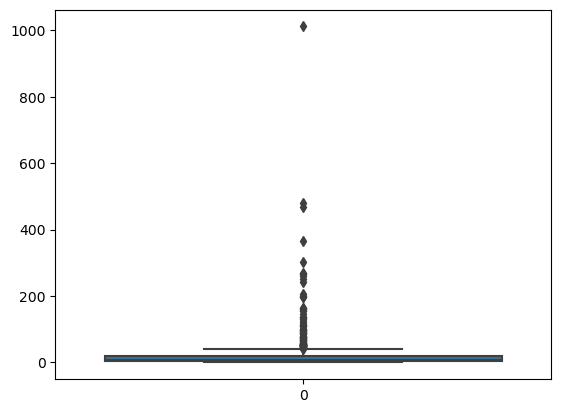

In [10]:
from scipy import fft
eutetic_depth = depthwise_df.query("depth_model == 'depth to eutectic'")['depth'].values

yf = fft.rfft(eutetic_depth)
xf = fft.rfftfreq(len(eutetic_depth))
yf[0] = 0

sns.boxplot(np.abs(yf))

In [11]:
signal_std = np.std(np.abs(yf))
signal_std

66.6514186381335

In [12]:
low_freq = np.abs(yf)[:len(yf)//5]
low_freq

array([   0.        ,  136.15201274,  265.76910901,  147.11156462,
        164.2151076 ,  163.08471519, 1011.9343562 ,  481.0042929 ,
        468.52608045,  109.09552634,  198.5965983 ,  259.62492666,
        243.02287863,   64.70329278,  160.8005722 ,  130.89284995,
        366.00080059,  303.70477274,  207.16252275,  270.75553984,
         70.48198223,   58.63263241,   76.2952844 ,  158.04378832,
         50.15121109,  198.66384342,   22.75493407,  252.22015097,
        109.90699187,   67.24790046,  201.57235088,  112.36891627,
         59.54240396,  265.90128269,   94.72302546,   70.22347983,
        155.20879143,  117.73005949,  125.1392423 ,   53.7979013 ,
         88.84539813,   80.25349097,   75.83048362,   59.56383807,
        135.99467816,   53.28904335,  135.21156428,   45.41514444,
         73.52764798,   97.56018702,   53.22640539,   44.96972066,
         95.73013259,   30.68446694,   47.45853093,  100.3219969 ,
         84.51495282,   86.98258032,   10.05783715,   64.75871

In [13]:
low_freq[low_freq > signal_std*3] 

array([ 265.76910901, 1011.9343562 ,  481.0042929 ,  468.52608045,
        259.62492666,  243.02287863,  366.00080059,  303.70477274,
        207.16252275,  270.75553984,  252.22015097,  201.57235088,
        265.90128269])

In [14]:
geu.predict_eutetic(eutetic_depth)

{'std': 2.1609311062788135,
 'num_low_freq_impules': 8,
 'prediction': 'vigorously convective'}

In [15]:
from scipy.signal import argrelextrema


low_freq
condition_1 = 


local_maxima = low_freq[argrelextrema(low_freq, np.greater)]

local_maxima[local_maxima > std]


SyntaxError: invalid syntax (3369464457.py, line 5)